In [1]:
import pandas as pd
import numpy as np
import openpyxl

In [141]:
import requests
import json
import pandas as pd
import time
from datetime import datetime
from os import path
import requests
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np; np.random.seed(0)
from datetime import date
import scipy.stats

In [142]:
from scipy import stats

In [143]:
import pandas as pd
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from typing import Dict, Tuple, Callable
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

In [144]:
from __future__ import print_function
import matplotlib.ticker as ticker
from colour import Color

In [145]:
#yellow
color1 = '#%02x%02x%02x' % (255, 255, 160)
#bright-blue
color2 = '#%02x%02x%02x' % (0, 0, 180)
#sky-blue
color3 = '#%02x%02x%02x' % (180, 240, 255)
#dark-blue
color4 = '#%02x%02x%02x' % (0, 0, 80)
#steel-blue
color4 = '#%02x%02x%02x' % (60, 100, 165)

In [146]:
#snapshot files

In [147]:
df_d = pd.read_csv('snapshot-report-d.csv')
df_h = pd.read_csv('snapshot-report-h.csv')

In [148]:
#recoding the NaNs to 0

In [149]:
df_d = df_d.fillna(0)
df_h = df_h.fillna(0)

In [160]:
#creating the weighted vesion of the original choices, df_d (dai), df_h (hopr)

In [151]:
df_d['ch.7'] = df_d['choice.7']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.6'] = df_d['choice.6']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.5'] = df_d['choice.5']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.4'] = df_d['choice.4']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.3'] = df_d['choice.3']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.2'] = df_d['choice.2']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']
df_d['ch.1'] = df_d['choice.1']/(df_d['choice.7'] + df_d['choice.6'] + df_d['choice.5'] + df_d['choice.4'] + df_d['choice.3'] + df_d['choice.2'] + df_d['choice.1'])*df_d['balance']

In [152]:
sum_choices_h = df_h['choice.5'] + df_h['choice.4'] + df_h['choice.3'] + df_h['choice.2'] + df_h['choice.1']
b = df_h['balance']

In [153]:
df_h['ch.1'] = df_h['choice.1']/sum_choices_h*b
df_h['ch.2'] = df_h['choice.2']/sum_choices_h*b
df_h['ch.3'] = df_h['choice.3']/sum_choices_h*b
df_h['ch.4'] = df_h['choice.4']/sum_choices_h*b
df_h['ch.5'] = df_h['choice.5']/sum_choices_h*b

In [154]:
#sum of the weighted choices

In [155]:
df_d['choices'] = (df_d['ch.7'] + df_d['ch.6'] + df_d['ch.5'] + df_d['ch.4'] + df_d['ch.3'] + df_d['ch.2'] + df_d['ch.1'])

In [156]:
df_h['choices'] = (df_h['ch.5'] + df_h['ch.4'] + df_h['ch.3'] + df_h['ch.2'] + df_h['ch.1'])

In [157]:
#subfile from the new weighted variables

In [158]:
df_w = df_d[["ch.1", "ch.2", "ch.3", "ch.4", "ch.5", "ch.6", "ch.7"]]

In [159]:
df_w_h = df_h[["ch.1", "ch.2", "ch.3", "ch.4", "ch.5"]]

In [ ]:
#listing the columns of the weighted files and summing up the aggregation column 

In [19]:
g = df_w.columns
s = df_d['choices'].sum()

In [20]:
g_h = df_w_h.columns
s_h = df_h['choices'].sum()

In [21]:
#calculating the shares of the choices based on the calculated variables

In [22]:
weighted_prop = []
for i in g:
    a = df_w[i].sum()/s
    weighted_prop.append(a)

In [161]:
weighted_prop_h = []
for i in g_h:
    a = df_w_h[i].sum()/s_h
    weighted_prop_h.append(a)

In [162]:
weighted_prop

[0.02998570734714411,
 0.09741908320980887,
 0.14040598240606286,
 0.26077281240990685,
 0.04138736416693406,
 0.2761316809072232,
 0.1538973695529202]

In [163]:
weighted_prop_h

[0.2702593929251076,
 0.09398486953860434,
 0.3064212368378067,
 0.29377155445072867,
 0.03556294624775256]

In [26]:
#creating the new quadratic weighted variables

In [164]:
df_d['ch.7b'] = df_d['ch.7']**(1/2)
df_d['ch.6b'] = df_d['ch.6']**(1/2)
df_d['ch.5b'] = df_d['ch.5']**(1/2)
df_d['ch.4b'] = df_d['ch.4']**(1/2)
df_d['ch.3b'] = df_d['ch.3']**(1/2)
df_d['ch.2b'] = df_d['ch.2']**(1/2)
df_d['ch.1b'] = df_d['ch.1']**(1/2)

In [165]:
df_h['ch.5b'] = df_h['ch.5']**(1/2)
df_h['ch.4b'] = df_h['ch.4']**(1/2)
df_h['ch.3b'] = df_h['ch.3']**(1/2)
df_h['ch.2b'] = df_h['ch.2']**(1/2)
df_h['ch.1b'] = df_h['ch.1']**(1/2)

In [166]:
#subfiles from the new variables and the sum of them in the original dataframe

In [167]:
df_qw = df_d[["ch.1b", "ch.2b", "ch.3b", "ch.4b", "ch.5b", "ch.6b", "ch.7b"]]

In [31]:
df_qw_h = df_h[["ch.1b", "ch.2b", "ch.3b", "ch.4b", "ch.5b"]]

In [32]:
df_d['choices_b'] = df_d['ch.7'] + df_d['ch.6b'] + df_d['ch.5b'] + df_d['ch.4b'] + df_d['ch.3b'] + df_d['ch.2b'] + df_d['ch.1b']

In [33]:
df_h['choices_b'] = df_h['ch.5b'] + df_h['ch.4b'] + df_h['ch.3b'] + df_h['ch.2b'] + df_h['ch.1b']

In [168]:
#list of columns

In [169]:
f = df_qw.columns

In [170]:
f_h = df_qw_h.columns

In [171]:
#creating a list from the square of the choices sum

In [172]:
sum_sq = []
for i in f:
    d = df_qw[i].sum()**2
    sum_sq.append(d)

In [173]:
sum_sq_h = []
for i in f_h:
    d = df_qw_h[i].sum()**2
    sum_sq_h.append(d)

In [174]:
sum_sq

[6272767.436474023,
 31486850.610992204,
 43467656.1684103,
 20991790.827679027,
 11841834.614466973,
 175643742.8688648,
 39902406.01675005]

In [175]:
sum_sq_h

[65918243.85582987,
 38440562.37032022,
 145084991.2764962,
 312816858.1857742,
 6202667.323311114]

In [176]:
#calculating the shares of choices based on the quadratic variables

In [177]:
sq = sum(sum_sq)
sq

329607048.54363734

In [178]:
sq_h = sum(sum_sq_h)
sq_h

568463323.0117316

In [179]:
quadratic_prop = []
for i in sum_sq:
    t = i/sq
    quadratic_prop.append(t)   

In [180]:
quadratic_prop_h = []
for i in sum_sq_h:
    t = i/sq_h
    quadratic_prop_h.append(t)

In [181]:
quadratic_prop

[0.01903104761924883,
 0.09552845046887277,
 0.13187720456971821,
 0.06368732380096502,
 0.03592712797493227,
 0.5328883094125063,
 0.12106053615375671]

In [182]:
quadratic_prop_h

[0.11595865764319414,
 0.06762188660943198,
 0.25522313472720215,
 0.5502850325126754,
 0.010911288507496387]

In [183]:
df_qw.describe()

,ch.1b,ch.2b,ch.3b,ch.4b,ch.5b,ch.6b,ch.7b
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,9.174173,20.554266,24.150185,16.782710,12.605116,48.546027,23.138590
std,28.938566,50.706357,61.085426,87.947757,33.361478,78.258115,64.762930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,8.110262,0.000000
75%,0.000000,0.000000,18.165902,0.000000,0.000000,78.354208,0.000000
max,181.345244,326.003722,574.272694,1215.025198,226.498933,574.272694,477.283271


In [184]:
#calculating the one account one vote

In [185]:
df_d['ch.1d'] = df_d['choice.1'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.2d'] = df_d['choice.2'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.3d'] = df_d['choice.3'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.4d'] = df_d['choice.4'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.5d'] = df_d['choice.5'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.6d'] = df_d['choice.6'].apply(lambda x: 1 if x != 0 else 0)
df_d['ch.7d'] = df_d['choice.7'].apply(lambda x: 1 if x != 0 else 0)

In [186]:
df_h['ch.1d'] = df_h['choice.1'].apply(lambda x: 1 if x != 0 else 0)
df_h['ch.2d'] = df_h['choice.2'].apply(lambda x: 1 if x != 0 else 0)
df_h['ch.3d'] = df_h['choice.3'].apply(lambda x: 1 if x != 0 else 0)
df_h['ch.4d'] = df_h['choice.4'].apply(lambda x: 1 if x != 0 else 0)
df_h['ch.5d'] = df_h['choice.5'].apply(lambda x: 1 if x != 0 else 0)

In [190]:
#summing up the number of votes choosen per account

In [194]:
df_d['choices_1a'] = (df_d['ch.7d'] + df_d['ch.6d'] + df_d['ch.5d'] + df_d['ch.4d'] + df_d['ch.3d'] + df_d['ch.2d'] + df_d['ch.1d'])

In [195]:
df_h['choices_1a'] = (df_h['ch.5d'] + df_h['ch.4d'] + df_h['ch.3d'] + df_h['ch.2d'] + df_h['ch.1d'])

In [196]:
#creating sublife from the dummy variables 

In [197]:
df_a1 = df_d[["ch.1d", "ch.2d", "ch.3d", "ch.4d", "ch.5d", "ch.6d", "ch.7d"]]

In [198]:
df_a1_h = df_h[["ch.1d", "ch.2d", "ch.3d", "ch.4d", "ch.5d"]]

In [199]:
#calculating the share of each choice

In [200]:
df_d['ch.1da'] = df_d['ch.1d']*1/df_d['choices_1a']
df_d['ch.2da'] = df_d['ch.2d']*1/df_d['choices_1a']
df_d['ch.3da'] = df_d['ch.3d']*1/df_d['choices_1a']
df_d['ch.4da'] = df_d['ch.4d']*1/df_d['choices_1a']
df_d['ch.5da'] = df_d['ch.5d']*1/df_d['choices_1a']
df_d['ch.6da'] = df_d['ch.6d']*1/df_d['choices_1a']
df_d['ch.7da'] = df_d['ch.7d']*1/df_d['choices_1a']

In [201]:
df_h['ch.1da'] = df_h['ch.1d']*1/df_h['choices_1a']
df_h['ch.2da'] = df_h['ch.2d']*1/df_h['choices_1a']
df_h['ch.3da'] = df_h['ch.3d']*1/df_h['choices_1a']
df_h['ch.4da'] = df_h['ch.4d']*1/df_h['choices_1a']
df_h['ch.5da'] = df_h['ch.5d']*1/df_h['choices_1a']

In [202]:
#subfiles

In [58]:
df_a1a = df_d[["ch.1da", "ch.2da", "ch.3da", "ch.4da", "ch.5da", "ch.6da", "ch.7da"]]

,ch.1da,ch.2da,ch.3da,ch.4da,ch.5da,ch.6da,ch.7da
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.5,0.0,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...
268,0.0,0.0,0.5,0.0,0.0,0.5,0.0
269,0.0,0.0,0.0,0.0,0.0,1.0,0.0
270,0.0,0.0,0.0,0.0,0.0,1.0,0.0
271,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [203]:
df_a1a_h = df_h[["ch.1da", "ch.2da", "ch.3da", "ch.4da", "ch.5da"]]

In [60]:
df_d['choices_1aa'] = (df_d['ch.7da'] + df_d['ch.6da'] + df_d['ch.5da'] + df_d['ch.4da'] + df_d['ch.3da'] + df_d['ch.2da'] + df_d['ch.1da'])

In [61]:
df_h['choices_1aa'] = (df_h['ch.5da'] + df_h['ch.4da'] + df_h['ch.3da'] + df_h['ch.2da'] + df_h['ch.1da'])

In [62]:
j = df_a1a.columns
l = df_d['choices_1aa'].sum()

In [64]:
j_h = df_a1a_h.columns
l_h = df_h['choices_1aa'].sum()

In [65]:
l_h

296.0

In [66]:
oneaccount_prop = []
for i in j:
    a = df_a1a[i].sum()/l
    oneaccount_prop.append(a)

In [67]:
oneaccount_prop_h = []
for i in j_h:
    a = df_a1a_h[i].sum()/l_h
    oneaccount_prop_h.append(a)

In [207]:
oneaccount_prop

[0.05450898308041165,
 0.12013779870922726,
 0.15371533228676085,
 0.06030873888016745,
 0.10121227978370835,
 0.3646432932147217,
 0.1454735740450026]

In [206]:
oneaccount_prop_h

[0.16041666666666668,
 0.15112612612612614,
 0.21925675675675677,
 0.40394144144144145,
 0.065259009009009]

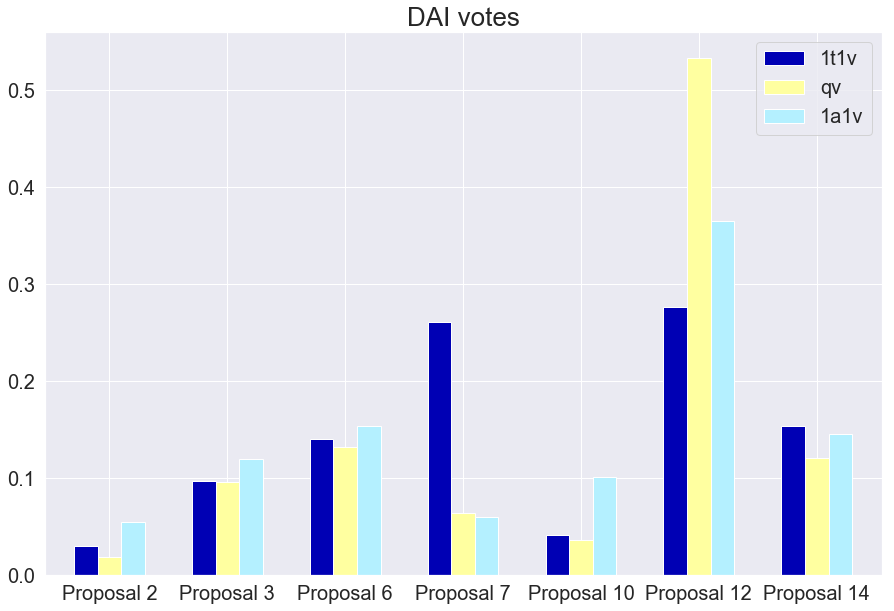

In [129]:
c = [color2, color1, color3]
index = ['Proposal 2', "Proposal 3", "Proposal 6", "Proposal 7", "Proposal 10", "Proposal 12", "Proposal 14"]
df = pd.DataFrame({'1t1v': weighted_prop,
                   'qv': quadratic_prop,
                  '1a1v': oneaccount_prop}, index=index)
ax = df.plot.bar(rot=0, width=0.6, fontsize=20, figsize=(15, 10), color=c)
ax.set_title('DAI votes', fontsize=26)
ax.legend(fontsize=20)
plt.savefig('dai_votes.png')

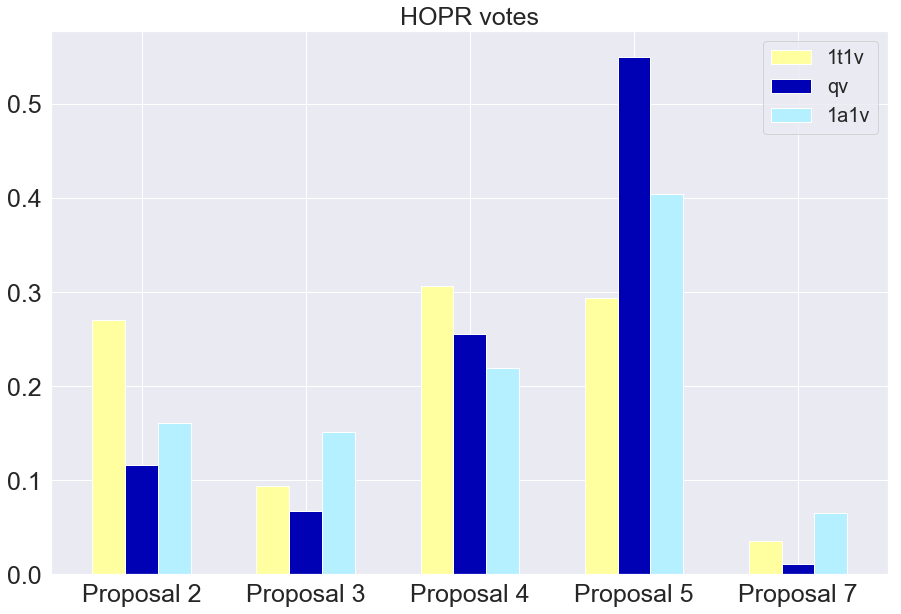

In [130]:
c = [color1, color2, color3]
index = ['Proposal 2', "Proposal 3", "Proposal 4", "Proposal 5", "Proposal 7"]
df = pd.DataFrame({'1t1v': weighted_prop_h,
                   'qv': quadratic_prop_h,
                  '1a1v': oneaccount_prop_h}, index=index)
ax = df.plot.bar(rot=0, width=0.6, fontsize=25, figsize=(15, 10), color=c)
ax.set_title('HOPR votes', fontsize=25)
ax.legend(fontsize=20)
plt.savefig('hopr_votes.png')

Text(0.5,1,'quadratic_dai')

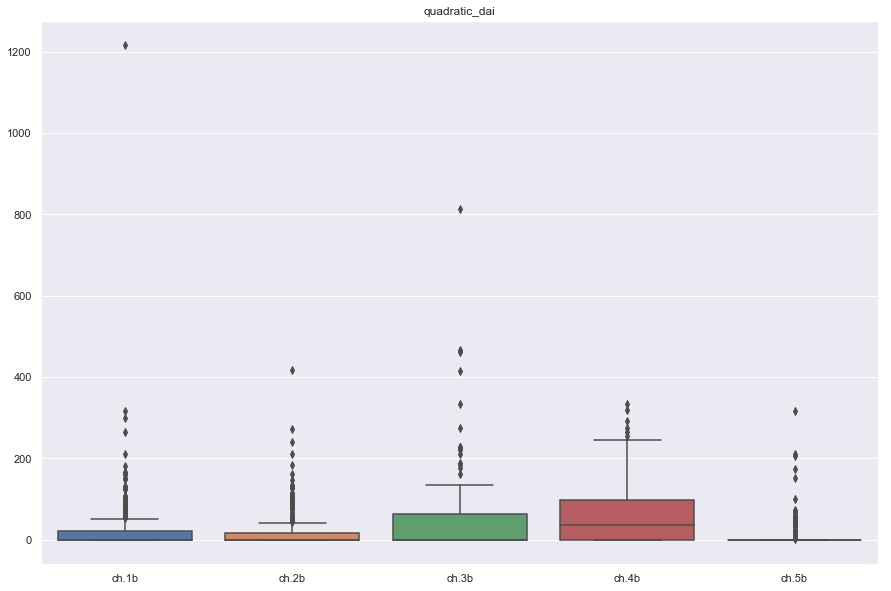

In [211]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df_qw_h).set_title('quadratic_dai')

z = np.abs(stats.zscore(df_w))
print(z)

threshold = 3
out_sok = np.where(z > 3)
out_df = pd.DataFrame(data=out_sok)
out_df

toremove = np.unique(out_sok[0])
toremove

df_w = df_w.drop(index = toremove)